In [128]:
# data analysis and wrangling
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import random as rnd
import json
import os.path
import math
from sklearn.metrics import euclidean_distances
import face_recognition


# visualization
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from PIL import Image
# machine learning
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import feature_extraction
from sklearn.cluster import KMeans

%matplotlib inline


In [81]:
VIDEO = 'video_1'
PATH  = 'data/{}/data'.format(VIDEO)

def imgshow(file):
    image = Image.open('data/{}/face/{}'.format(VIDEO, file+".jpg"))
    image.show()    

In [11]:
json_lst = []
# Load Files in
files = [f for f in os.listdir(PATH)]
for f in files:
    #print(f)
    file_name = PATH+"/"+f
    data = open(file_name, 'r').read()
    data = json.loads(data)
    json_lst.append(data)    

Frame_67_Face_74.json
Frame_18_Face_18.json
Frame_31_Face_27.json
Frame_1_Face_1.json
Frame_69_Face_75.json
Frame_75_Face_81.json
Frame_45_Face_48.json
Frame_59_Face_64.json
Frame_41_Face_40.json
Frame_72_Face_78.json
Frame_15_Face_15.json
Frame_21_Face_22.json
Frame_19_Face_19.json
Frame_62_Face_67.json
Frame_33_Face_29.json
Frame_43_Face_45.json
Frame_33_Face_28.json
Frame_37_Face_36.json
Frame_46_Face_50.json
Frame_5_Face_5.json
Frame_3_Face_3.json
Frame_53_Face_59.json
Frame_83_Face_86.json
Frame_44_Face_47.json
Frame_43_Face_44.json
Frame_47_Face_53.json
Frame_24_Face_25.json
Frame_77_Face_83.json
Frame_12_Face_12.json
Frame_78_Face_84.json
Frame_38_Face_37.json
Frame_6_Face_6.json
Frame_45_Face_49.json
Frame_73_Face_79.json
Frame_36_Face_33.json
Frame_48_Face_54.json
Frame_56_Face_61.json
Frame_50_Face_58.json
Frame_36_Face_34.json
Frame_57_Face_62.json
Frame_41_Face_41.json
Frame_66_Face_71.json
Frame_4_Face_4.json
Frame_22_Face_24.json
Frame_16_Face_16.json
Frame_55_Face_60.jso

In [25]:
# Ler dos dados
df = pd.DataFrame(json_lst)
df

age                                        face_encode          filename  \
0    28  [-0.06104235351085663, 0.087809719145298, 0.00...  Frame_67_Face_74   
1    31  [-0.047167032957077026, 0.07096441090106964, 0...  Frame_18_Face_18   
2    26  [-0.03251942992210388, 0.12871268391609192, 0....  Frame_31_Face_27   
3    30  [-0.08731923997402191, 0.059576183557510376, 0...    Frame_1_Face_1   
4    31  [-0.13991206884384155, 0.0679367259144783, 0.0...  Frame_69_Face_75   
5    27  [-0.020048364996910095, 0.08193252980709076, 0...  Frame_75_Face_81   
6    32  [-0.058422237634658813, 0.10472062230110168, 0...  Frame_45_Face_48   
7    37  [-0.08477601408958435, 0.13571122288703918, 0....  Frame_59_Face_64   
8    25  [-0.06735698878765106, 0.10298667848110199, 0....  Frame_41_Face_40   
9    31  [-0.08778735995292664, 0.09631244093179703, 0....  Frame_72_Face_78   
10   29  [-0.0733812004327774, 0.0293489508330822, 0.04...  Frame_15_Face_15   
11   28  [-0.04642969369888306, 0.08232296258211136, 0....  Frame_21_Face_22   
12   25  [-0.04680822789669037, 0.07841528952121735, 0....  Frame_19_Face_19   
13   30  [-0.11061060428619385, 0.12125469744205475, 0....  Frame_62_Face_67   
14   28  [-0.12499348819255829, 0.1069939061999321, 0.0...  Frame_33_Face_29   
15   25  [-0.11667513847351074, 0.11083956807851791, 0....  Frame_43_Face_45   
16   22  [-0.08945988118648529, 0.1424393206834793, 0.0...  Frame_33_Face_28   
17   23  [-0.12405925989151001, 0.09737150371074677, 0....  Frame_37_Face_36   
18   32  [-0.05823671817779541, 0.11110067367553711, 0....  Frame_46_Face_50   
19   28  [-0.06141555309295654, 0.05424799025058746, 0....    Frame_5_Face_5   
20   30  [-0.07218991219997406, 0.0726621076464653, 0.0...    Frame_3_Face_3   
21   27  [-0.07461020350456238, 0.08418428897857666, 0....  Frame_53_Face_59   
22   27  [-0.07565182447433472, 0.07065467536449432, 0....  Frame_83_Face_86   
23   25  [-0.11129900813102722, 0.15234169363975525, 0....  Frame_44_Face_47   
24   33  [-0.058597758412361145, 0.0858473852276802, 0....  Frame_43_Face_44   
25   24  [-0.10831055045127869, 0.14204099774360657, 0....  Frame_47_Face_53   
26   29  [-0.0750880241394043, 0.06742691993713379, 0.0...  Frame_24_Face_25   
27   30  [-0.04836796224117279, 0.1240588128566742, 0.0...  Frame_77_Face_83   
28   28  [-0.08704757690429688, 0.023927267640829086, 0...  Frame_12_Face_12   
29   29  [-0.062066659331321716, 0.1035008430480957, 0....  Frame_78_Face_84   
..  ...                                                ...               ...   
56   29  [-0.0775049477815628, 0.13100804388523102, -0....  Frame_65_Face_70   
57   25  [-0.0999695360660553, 0.12688468396663666, 0.0...  Frame_58_Face_63   
58   30  [-0.08958522975444794, 0.13939359784126282, -0...  Frame_60_Face_65   
59   27  [-0.10961633920669556, 0.022819139063358307, 0...  Frame_11_Face_11   
60   22  [-0.10575947165489197, 0.06279823184013367, 0....  Frame_35_Face_32   
61   31  [-0.07783067226409912, 0.04184330254793167, 0....  Frame_13_Face_13   
62   32  [-0.193378284573555, 0.14120681583881378, 0.06...  Frame_39_Face_39   
63   28  [-0.11467906832695007, 0.1554570347070694, 0.0...  Frame_48_Face_55   
64   23  [-0.033346518874168396, 0.11731400340795517, 0...  Frame_30_Face_26   
65   29  [-0.12036427855491638, 0.09642638266086578, 0....  Frame_82_Face_85   
66   31  [-0.11149895191192627, 0.02655147761106491, 0....  Frame_14_Face_14   
67   27  [-0.12408119440078735, 0.09628231823444366, 0....  Frame_38_Face_38   
68   20  [-0.061595797538757324, 0.1583673059940338, 0....  Frame_35_Face_31   
69   33  [-0.043177515268325806, 0.1088676005601883, 0....  Frame_44_Face_46   
70   23  [-0.08629979193210602, 0.09727758169174194, 0....  Frame_19_Face_20   
71   25  [-0.1036529541015625, 0.11459621787071228, 0.1...  Frame_42_Face_43   
72   26  [-0.14419744908809662, 0.11870944499969482, 0....  Frame_70_Face_76   
73   30  [-0.050245970487594604, 0.06642231345176697, 0...  Frame_60_Face_66   
74  

### Kmeans

In [109]:
nclust = 5
X      = [x for x in df.face_encode.values]

kmeans = KMeans(n_clusters=nclust).fit(X)



In [110]:
df['label'] = kmeans.labels_
kmeans.labels_

array([4, 3, 2, 2, 4, 0, 3, 0, 3, 0, 2, 3, 3, 0, 1, 1, 4, 1, 3, 2, 2, 2, 2,
       1, 3, 1, 2, 0, 2, 0, 4, 2, 1, 0, 4, 3, 0, 3, 1, 0, 1, 0, 2, 3, 2, 2,
       0, 1, 3, 2, 3, 2, 4, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 4,
       3, 1, 1, 2, 4, 0, 0, 3, 2, 1, 1, 4, 0, 0, 3, 3, 0], dtype=int32)

In [107]:
AvgSil = []
clusters=range(1, 100)

for k in clusters:
    print("k:",k)
    # k-means
    km = KMeans(n_clusters=nclust).fit(X)


    # http://www.sthda.com/english/wiki/determining-the-optimal-number-of-clusters-3-must-known-methods-unsupervised-machine-learning   
    # Average silhouette 
    avg_sil = silhouette_score(X, km.labels_)
    AvgSil.append(avg_sil)

k: 1
k: 2
k: 3
k: 4
k: 5
k: 6
k: 7
k: 8
k: 9
k: 10
k: 11
k: 12
k: 13
k: 14
k: 15
k: 16
k: 17
k: 18
k: 19
k: 20
k: 21
k: 22
k: 23
k: 24
k: 25
k: 26
k: 27
k: 28
k: 29
k: 30
k: 31
k: 32
k: 33
k: 34
k: 35
k: 36
k: 37
k: 38
k: 39
k: 40
k: 41
k: 42
k: 43
k: 44
k: 45
k: 46
k: 47
k: 48
k: 49
k: 50
k: 51
k: 52
k: 53
k: 54
k: 55
k: 56
k: 57
k: 58
k: 59
k: 60
k: 61
k: 62
k: 63
k: 64
k: 65
k: 66
k: 67
k: 68
k: 69
k: 70
k: 71
k: 72
k: 73
k: 74
k: 75
k: 76
k: 77
k: 78
k: 79
k: 80
k: 81
k: 82
k: 83
k: 84
k: 85
k: 86
k: 87
k: 88
k: 89
k: 90
k: 91
k: 92
k: 93
k: 94
k: 95
k: 96
k: 97
k: 98
k: 99


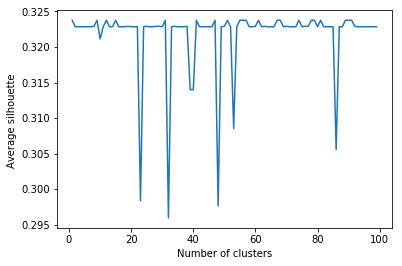

Cluster: 0


In [108]:
# Var IntraGrupo
plt.plot(clusters, AvgSil)
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette ')
plt.show()

print("Cluster:", np.argmax(AvgSil))

## Hierarchy

In [122]:
from scipy.cluster.hierarchy import ward, linkage, dendrogram 

dist = euclidean_distances(X)

In [123]:
dist.shape

(86, 86)

/home/marlesson/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':


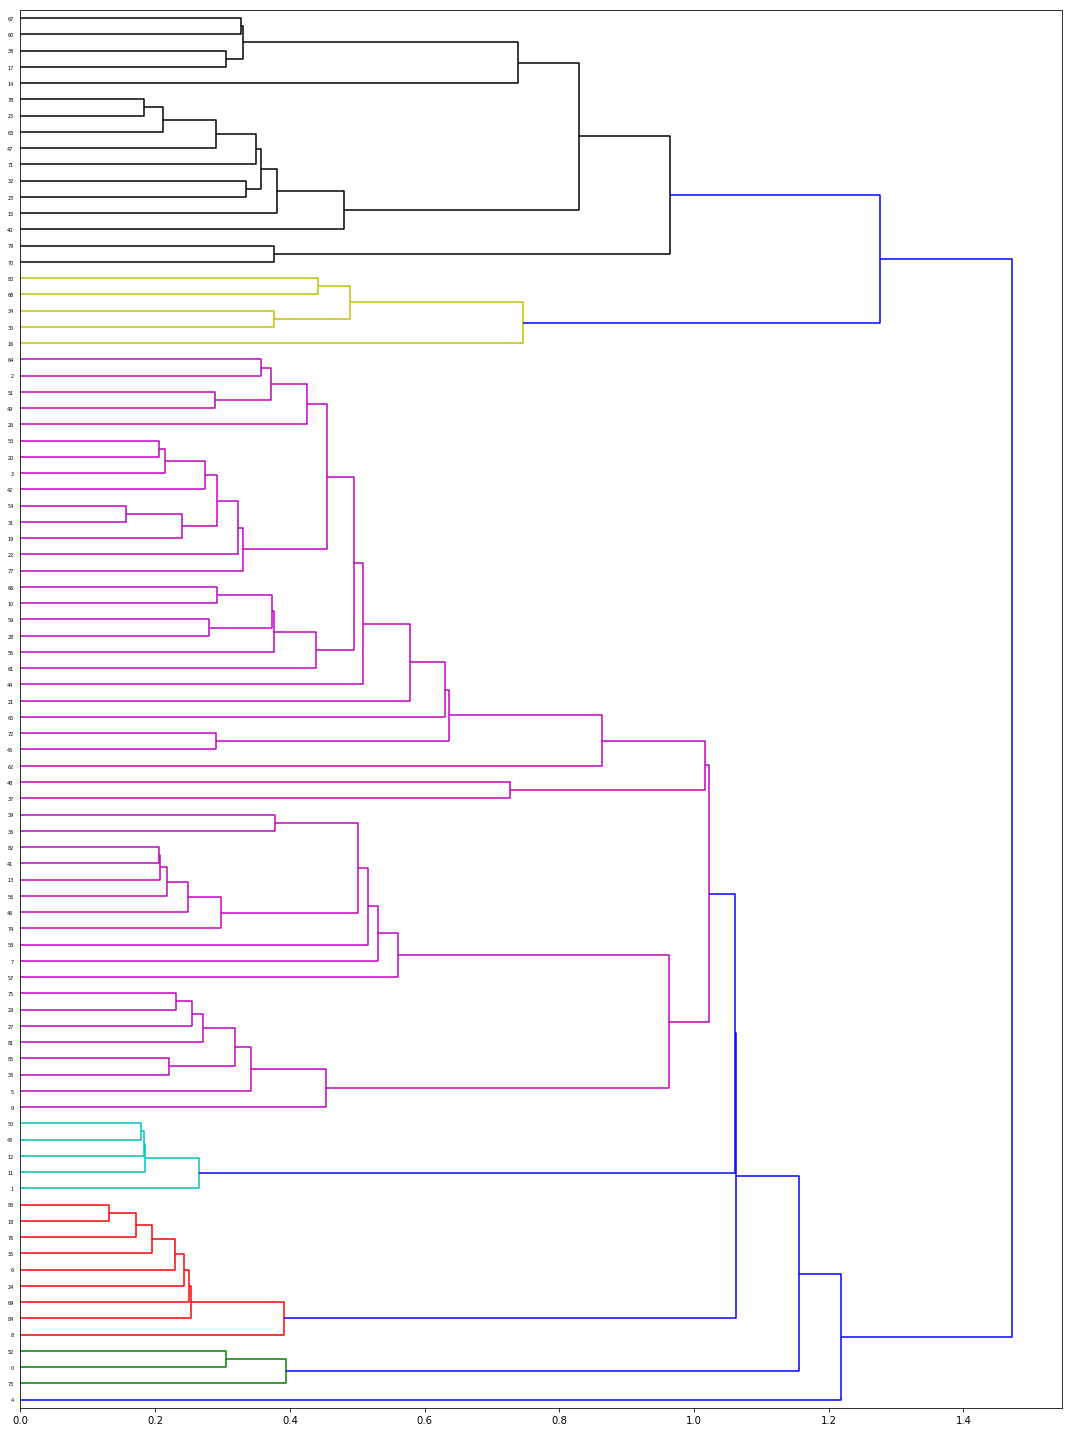

In [153]:
linkage_matrix = linkage(dist, method='single')
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right");

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
#plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [150]:
ax['color_list']

['g',
 'g',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'c',
 'c',
 'c',
 'c',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'b',
 'b',
 'b',
 'b',
 'y',
 'y',
 'y',
 'y',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'k',
 'b',
 'b']

In [138]:
face_recognition.face_distance(np.array([X[0]]), np.array(X[5]))

array([ 0.70098085])

In [135]:
np.array(X[1])

array([-0.04716703,  0.07096441,  0.04107501, -0.0532998 , -0.06277665,
        0.05742974, -0.06883474, -0.05386267,  0.23739003, -0.12374143,
        0.20478944,  0.13719702, -0.12069285, -0.14703622, -0.01558149,
        0.09186341, -0.12282016, -0.1711532 , -0.05092923, -0.02057138,
       -0.01396421,  0.06725986,  0.02774967,  0.01380976, -0.12573192,
       -0.30720061, -0.09241381, -0.05750314,  0.10996753, -0.10845552,
        0.02633239,  0.06455113, -0.1937429 ,  0.01232423,  0.03160873,
        0.11749883, -0.01982366, -0.00529113,  0.19283423,  0.0649192 ,
       -0.17473668, -0.02070265, -0.03438266,  0.22951946,  0.19048122,
       -0.01966125,  0.08182379, -0.06699146,  0.12743023, -0.21978915,
        0.11473655,  0.16287214,  0.10947964,  0.05128021,  0.08433042,
       -0.11668159, -0.01894376,  0.14755769, -0.155138  ,  0.07481098,
        0.0391167 , -0.0587515 , -0.08060058,  0.01416403,  0.14110257,
        0.14170043, -0.07461582, -0.27929085,  0.16860071, -0.18

### DBSCAN

In [155]:
from sklearn.cluster import DBSCAN


In [188]:
dist = euclidean_distances(X)
db   = DBSCAN(eps=0.6, min_samples=5)
labels = db.fit_predict(dist)

In [189]:
labels

array([-1,  0,  1,  1, -1,  2,  3, -1,  3,  2,  1,  0,  0,  4, -1,  5, -1,
       -1,  3,  1,  1,  1,  1,  5,  3,  5,  1,  2,  1,  2, -1,  1,  5,  2,
       -1,  3,  4, -1, -1,  4,  5,  4,  1,  0,  1, -1,  4,  5, -1,  1,  0,
        1, -1,  1,  1,  1,  4,  4,  4,  1, -1,  1, -1,  5,  1, -1,  1, -1,
       -1,  3, -1,  5, -1, -1,  4,  2,  3,  1,  5, -1, -1,  2,  4,  3,  3,
        2])

In [177]:
df['label'] = labels

In [185]:
for file in df[df['label'] == 6].filename.values:
    imgshow(file)